In [5]:
!pip install openpyxl

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_excel('heart_disease.xlsx',sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [12]:
df.shape

(908, 13)

In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(1)

In [22]:
df["oldpeak"].fillna(df["oldpeak"].mean(), inplace=True)

C:\Users\Raghul\AppData\Local\Temp\ipykernel_30028\3467812882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].mean(), inplace=True)


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
num_col=df.select_dtypes(["int","float"])
num_col

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.300000,0
1,41,135,203,132,0.000000,0
2,57,140,192,148,0.400000,0
3,52,118,186,190,0.000000,0
4,57,110,201,126,1.500000,0
...,...,...,...,...,...,...
903,53,125,0,120,1.500000,4
904,62,166,170,120,3.000000,4
905,56,170,0,123,2.500000,4
906,56,144,208,105,0.892308,4


In [31]:
cat_col=df.select_dtypes(include=['object'])

cat_col

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,normal,False,flat,fixed defect
2,Male,asymptomatic,normal,False,flat,fixed defect
3,Male,typical angina,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,normal,True,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,False,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,True,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,True,downsloping,normal
906,Male,non-anginal,st-t abnormality,TURE,downsloping,fixed defect


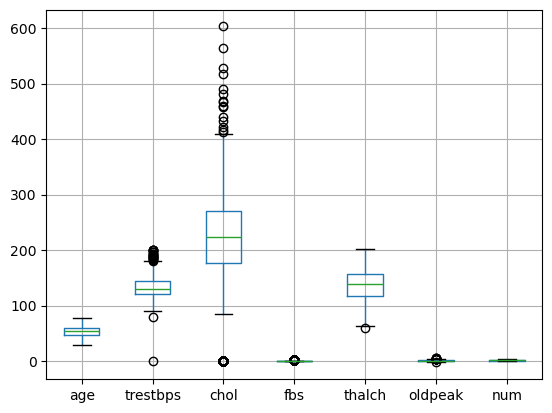

In [40]:
df.boxplot()
plt.show()

In [43]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

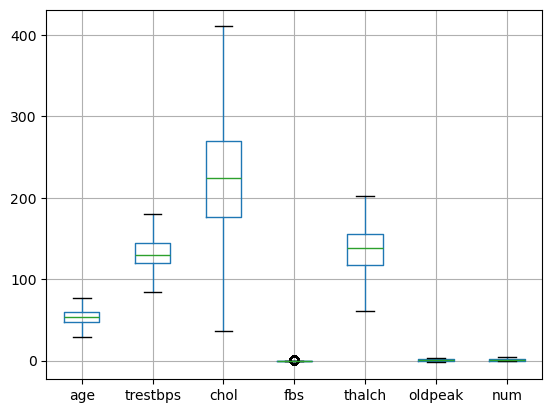

In [44]:
df.boxplot()
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ["sex", "cp", "restecg", "slope", "thal", "exang", "fbs"]

df[cat_cols] = df[cat_cols].astype(str)

 le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df[cat_cols].head())


   sex  cp  restecg  slope  thal  exang  fbs
0    1   3        0      0     0      1    1
1    1   1        1      1     0      1    0
2    1   0        1      1     0      1    0
3    1   3        0      1     0      1    0
4    1   0        1      1     0      3    0


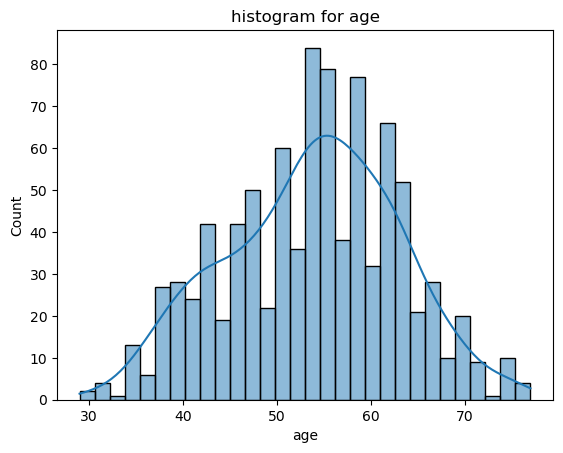

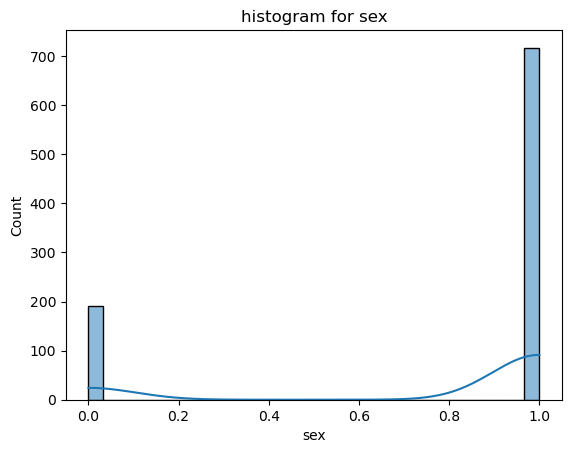

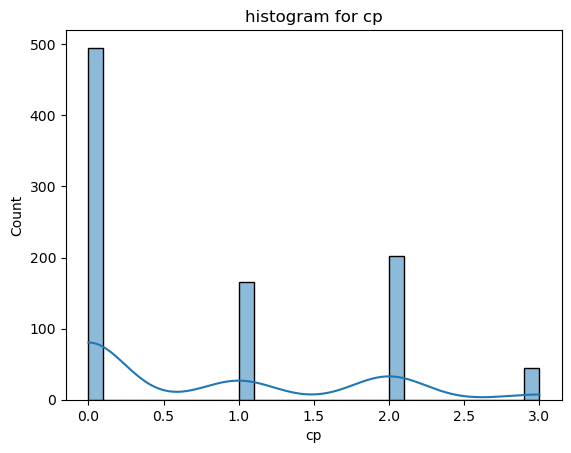

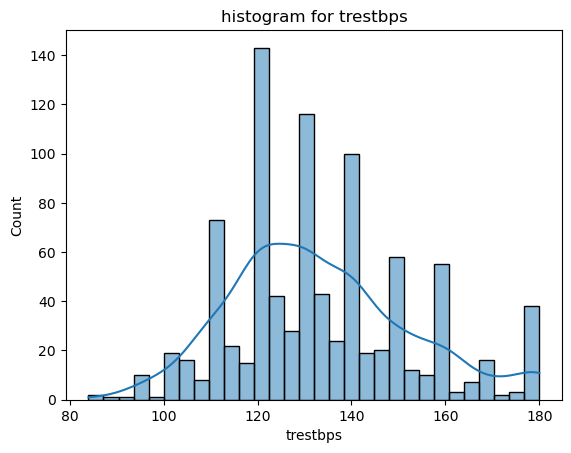

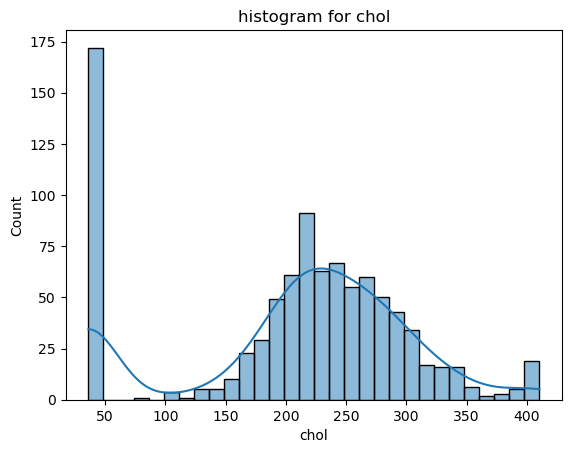

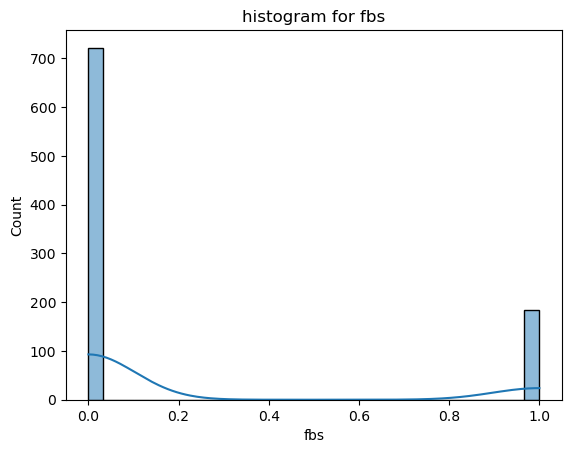

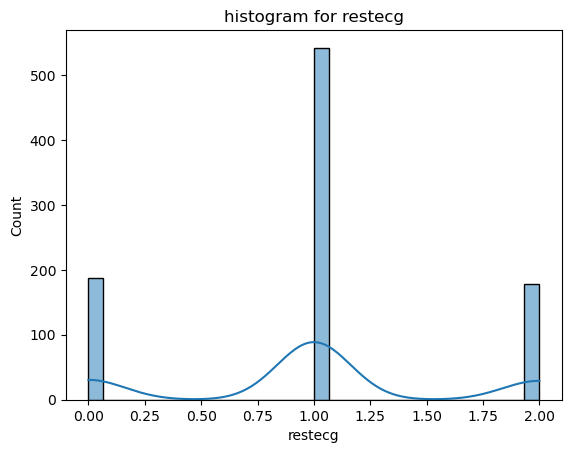

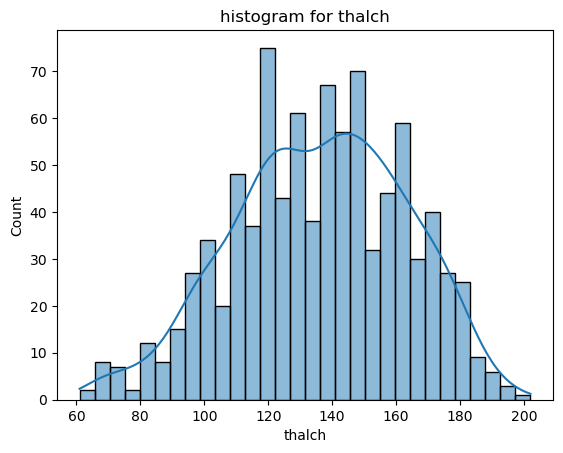

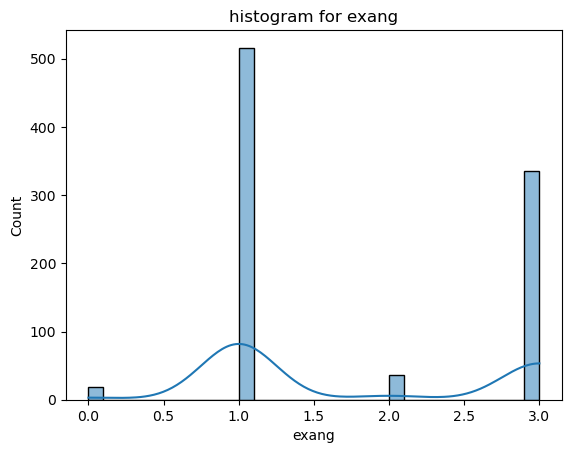

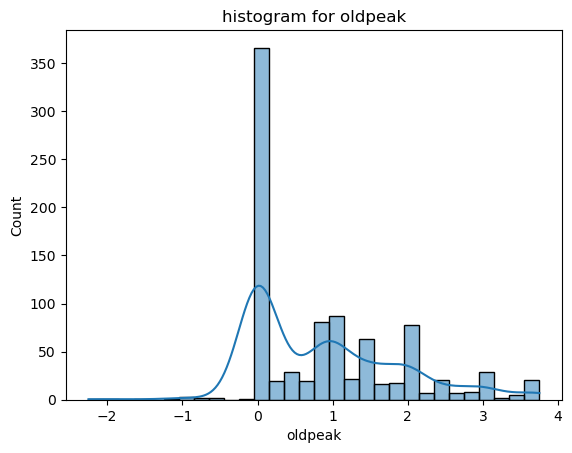

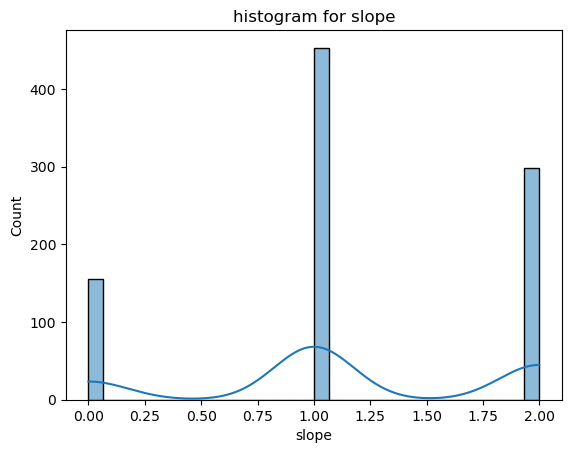

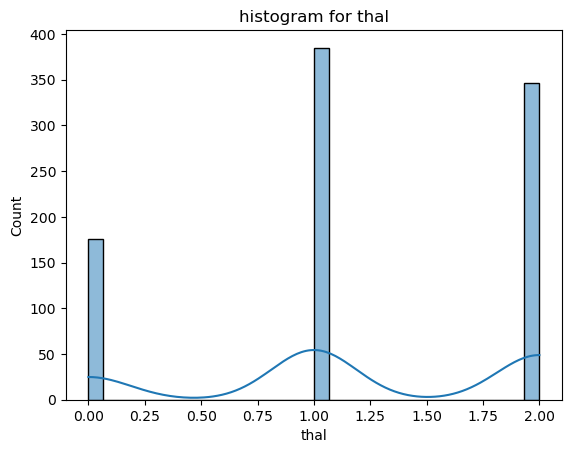

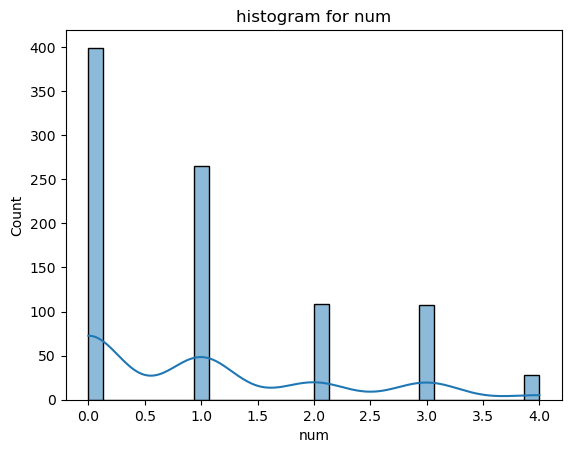

In [47]:
for col1 in df:
    plt.figure()
    sns.histplot(df[col1],kde=True,bins=30)
    plt.title(f"histogram for {col1}")
    plt.show()

<Axes: >

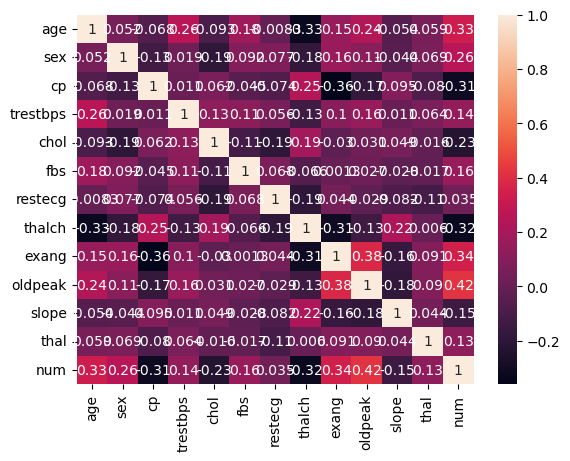

In [50]:
corr=df.corr()
sns.heatmap(corr,annot=True)

## Decision Tree Classsification

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

target=df[["num"]]
features=df.drop(columns=["num"])

In [58]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 12)
(182, 12)
(725, 1)
(182, 1)


In [78]:
dec_tree=DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=6)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.532967032967033

In [80]:
dec_tree=DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5384615384615384

In [75]:
dec_tree=DecisionTreeClassifier(criterion='gini', splitter='random',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5824175824175825

In [74]:
dec_tree=DecisionTreeClassifier(criterion='entropy', splitter='random',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5934065934065934

## Evaluation metrics

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        85
           1       0.39      0.47      0.43        49
           2       0.25      0.27      0.26        22
           3       0.25      0.05      0.08        22
           4       0.00      0.00      0.00         4

    accuracy                           0.54       182
   macro avg       0.32      0.32      0.30       182
weighted avg       0.50      0.54      0.51       182



C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
param={"criterion":["gini","entropy"],"splitter":["best","random"],"max_depth":range(1,5)}
grid_ser=GridSearchCV(dec_tree,param)
grid_ser.fit(x_train,y_train)
grid_ser.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [84]:
dec_tree=DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.532967032967033

## Model Evaluation

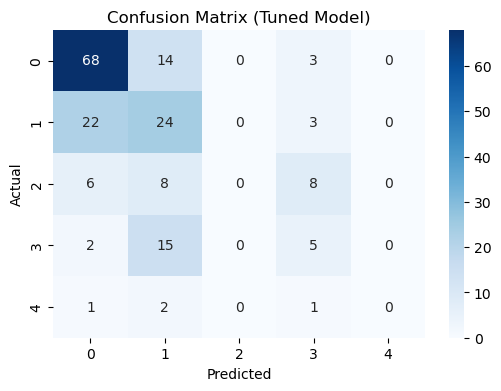

In [86]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

[Text(0.5446428571428571, 0.9, 'cp <= 0.5\nentropy = 1.933\nsamples = 725\nvalue = [314.0, 216.0, 86.0, 85.0, 24.0]'),
 Text(0.2857142857142857, 0.7, 'oldpeak <= 0.65\nentropy = 2.078\nsamples = 391\nvalue = [80, 160, 69, 62, 20]'),
 Text(0.4151785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'chol <= 203.5\nentropy = 1.869\nsamples = 140\nvalue = [52, 54, 20, 11, 3]'),
 Text(0.07142857142857142, 0.3, 'trestbps <= 153.5\nentropy = 1.791\nsamples = 63\nvalue = [7, 33, 16, 5, 2]'),
 Text(0.03571428571428571, 0.1, 'entropy = 1.916\nsamples = 54\nvalue = [7, 24, 16, 5, 2]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0, 0]'),
 Text(0.21428571428571427, 0.3, 'age <= 64.5\nentropy = 1.554\nsamples = 77\nvalue = [45, 21, 4, 6, 1]'),
 Text(0.17857142857142858, 0.1, 'entropy = 1.327\nsamples = 70\nvalue = [44, 20, 3, 3, 0]'),
 Text(0.25, 0.1, 'entropy = 2.128\nsamples = 7\nvalue = [1, 1, 1, 3, 1]'),
 Text(0.42857142857142855, 0.5, 'age <= 56.5\ne

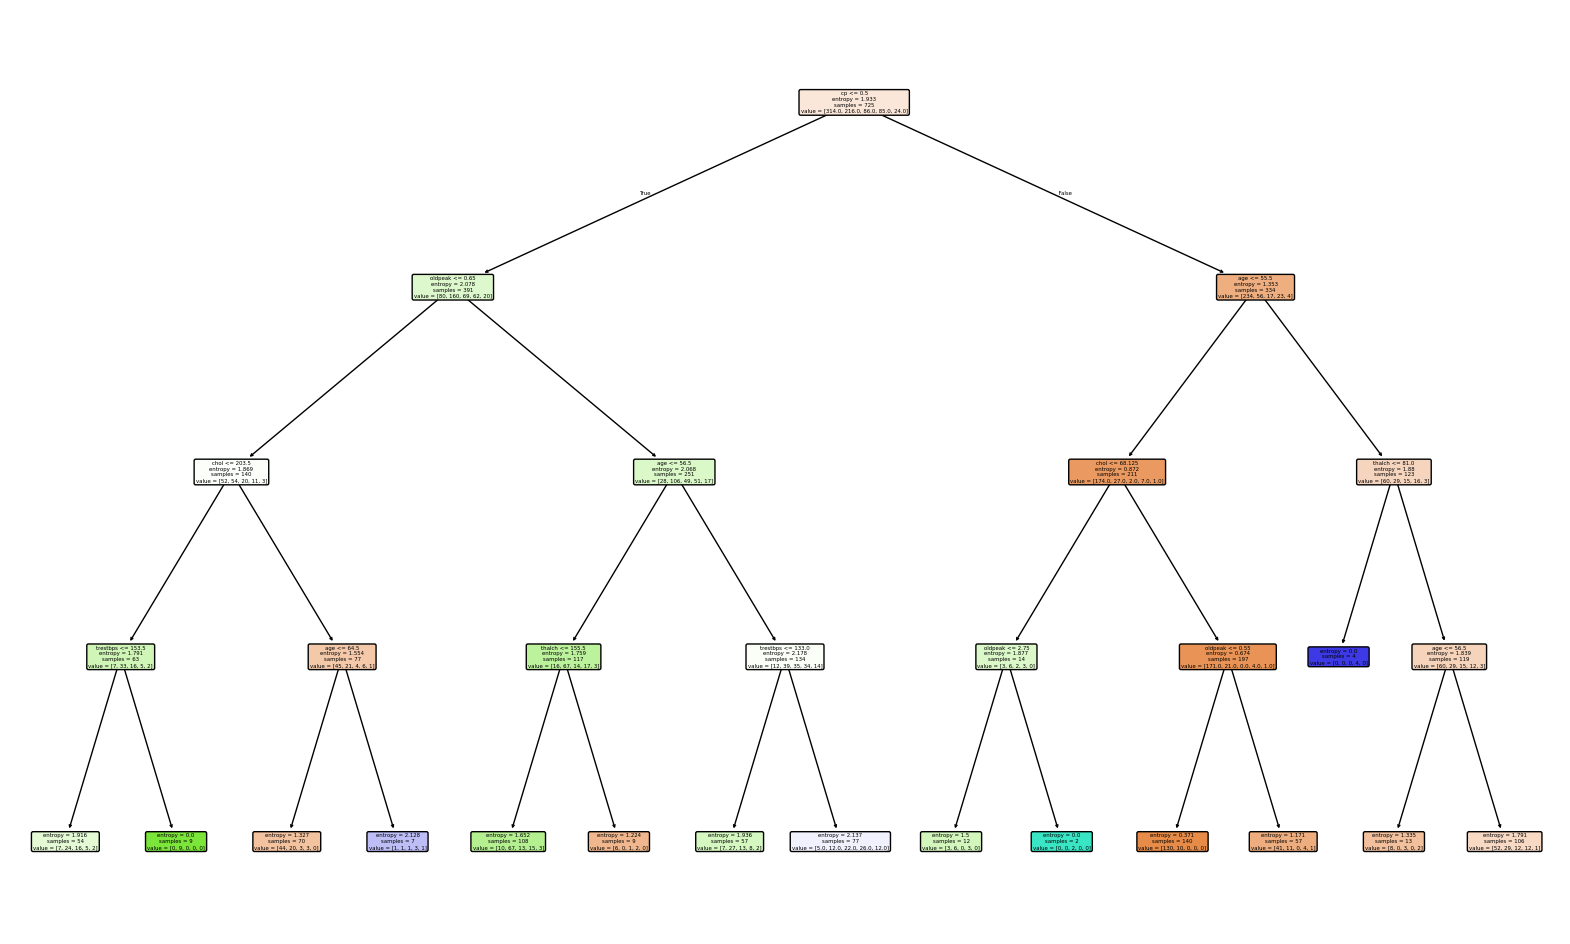

In [93]:
plt.figure(figsize=(20,12))
plot_tree(dec_tree,filled=True,feature_names=list(features),rounded=True)

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
np.random.seed(42)  
y_test = np.random.randint(0, 2, 100) 
model_predictions = np.random.random(100) 
fpr, tpr, thr = roc_curve(y_test, model_predictions)
auc_score = roc_auc_score(y_test, model_predictions)

In [99]:
print(fpr, tpr, thr,auc_score )

[0.         0.02272727 0.02272727 0.04545455 0.04545455 0.11363636
 0.11363636 0.13636364 0.13636364 0.15909091 0.15909091 0.18181818
 0.18181818 0.20454545 0.20454545 0.22727273 0.22727273 0.25
 0.25       0.27272727 0.27272727 0.29545455 0.29545455 0.34090909
 0.34090909 0.38636364 0.38636364 0.40909091 0.40909091 0.43181818
 0.43181818 0.47727273 0.47727273 0.5        0.5        0.52272727
 0.52272727 0.54545455 0.54545455 0.63636364 0.63636364 0.65909091
 0.65909091 0.70454545 0.70454545 0.75       0.75       0.84090909
 0.84090909 0.88636364 0.88636364 0.93181818 0.93181818 0.95454545
 0.95454545 0.97727273 0.97727273 1.         1.        ] [0.         0.         0.01785714 0.01785714 0.03571429 0.03571429
 0.05357143 0.05357143 0.07142857 0.07142857 0.08928571 0.08928571
 0.10714286 0.10714286 0.125      0.125      0.16071429 0.16071429
 0.30357143 0.30357143 0.33928571 0.33928571 0.35714286 0.35714286
 0.375      0.375      0.39285714 0.39285714 0.41071429 0.41071429
 0.55357143

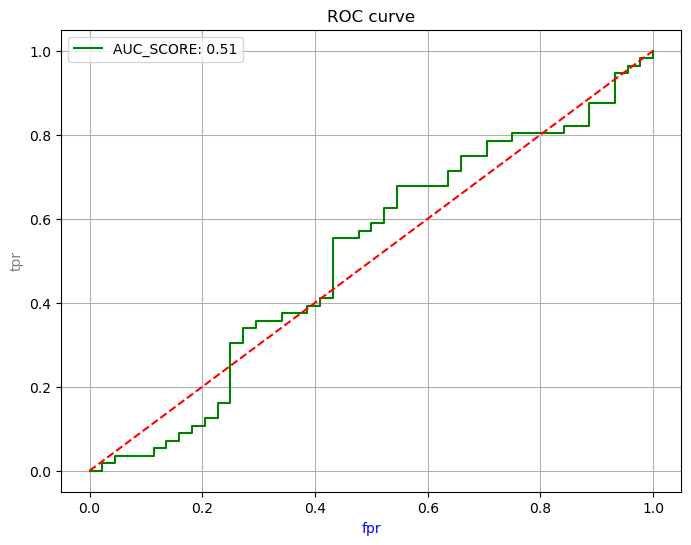

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", lw=1.5, label=f'AUC_SCORE: {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.xlabel("fpr", color="blue", size=10)
plt.ylabel("tpr", color="grey", size=10)
plt.title("ROC curve")
plt.legend()
plt.grid()
plt.show()

# Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


## Decision tree models have several key hyperparameters that impact their performance.
#### 1. max_depth :** It determines the tree's complexity and risk of overfitting.
#### 2. min_samples_split :** It affects the tree's ability to generalize.
#### 3. max_features :** It helps to prevent overfitting.
#### 4. criterion :** It is used to evaluate node impurities (gini, entropy) affects the tree's ability to capture subtle patterns in the data.

# 2. What is the difference between the Label encoding and One-hot encoding?

# Label encoding assigns a unique numerical value to each category.
# One-Hot encoding creates binary columns for each category, with only one column being “1” and the rest “0” for each observation.